In [165]:
from hdf5storage import loadmat, savemat 
import numpy as np 
import networkx as nx
from matplotlib import pyplot as plt 

In [209]:
# /home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/PCA_32chan_AGL/complex2coh.m
# Pcoh_boolean.mat is logical value partial coherence after AGL, with condition sorted 12sesx2x12conx5x448x448
# coh=loadmat('../../Cleaned_data/hilbert_datacov/Pcoh_boolean.mat')

# /home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/PCA_32chan_AGL/complex2coh.m
# Pcoh_all.mat is real value partial coherence after AGL, with condition sorted 12sesx2x12conx5x448x448
# coh=loadmat('../../Cleaned_data/hilbert_datacov/Pcoh_all.mat')

# /home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/PCA_32chan_AGL/hilbert2cov.m
# coh_all.mat is the coherence without AGL, with condition sorted 12sesx2x12conx5x448x448
# coh=loadmat('../../Cleaned_data/hilbert_datacov/coh_all.mat')

# /ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/python_lasso
# /home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/LassoCV_on_hilbert/reorganzied_for_python_ggm.m
# Pcoh_lasso_sorted.mat is partial coherence from lasso, with condition sorted 12sesx2x12conx5x448x448
coh=loadmat('/ssd/zhibin/1overf/Cleaned_sourcedata/cortical_source_data/python_lasso/Pcoh_lasso_sorted.mat')

In [210]:
coh.keys()

dict_keys(['Pcoh_lasso_sorted'])

In [211]:
# coh_all = coh['Pcoh_boolean']
# coh_all = coh['Pcoh_all']
# coh_all = coh['coh_all']
coh_all = coh['Pcoh_lasso_sorted']

np.shape(coh_all)

(12, 2, 12, 5, 448, 448)

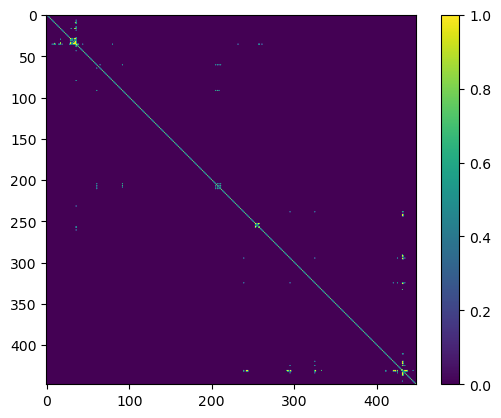

In [232]:
ses=11
subj=1
tr=11
freq=4
coh_mat=coh_all[ses,subj,tr,freq,:,:]
# plt.imshow(coh_mat,vmin=0,vmax=0.001)
plt.imshow(coh_mat.astype(bool)*1)
plt.colorbar()

In [212]:
nexp = 12*2*12
task = list()
feedback = list()
counter = 0
coh_stack = np.zeros((nexp,5,448,448))
for ses in range(12):
    for tr in range(12):
        for subj in range(2):
            coh_stack[counter,:,:,:] = coh_all[ses,subj,tr,:,:,:]
            if ses%2:
                task.append('synco')
            else:
                task.append('synch')
            if tr < 3:
                feedback.append('independent')
            elif (tr < 6):
                if subj == 0:
                    feedback.append('leader')
                else:
                    feedback.append('follower')
            elif (tr < 9):
                if subj == 1:
                    feedback.append('leader')
                else:
                    feedback.append('follower')
            else:
                feedback.append('mutual')
            counter = counter+1


In [213]:
independent_bool=[s=='independent' for s in feedback]
leader_bool=[s=='leader' for s in feedback]
follower_bool=[s=='follower' for s in feedback]
mutual_bool=[s=='mutual' for s in feedback]

In [214]:
independent_ind=np.where(independent_bool)
leader_ind=np.where(leader_bool)
follower_ind=np.where(follower_bool)
mutual_ind=np.where(mutual_bool)

In [215]:
independent_ind

(array([  0,   1,   2,   3,   4,   5,  24,  25,  26,  27,  28,  29,  48,
         49,  50,  51,  52,  53,  72,  73,  74,  75,  76,  77,  96,  97,
         98,  99, 100, 101, 120, 121, 122, 123, 124, 125, 144, 145, 146,
        147, 148, 149, 168, 169, 170, 171, 172, 173, 192, 193, 194, 195,
        196, 197, 216, 217, 218, 219, 220, 221, 240, 241, 242, 243, 244,
        245, 264, 265, 266, 267, 268, 269]),)

In [173]:
leader_ind

(array([  6,   8,  10,  13,  15,  17,  30,  32,  34,  37,  39,  41,  54,
         56,  58,  61,  63,  65,  78,  80,  82,  85,  87,  89, 102, 104,
        106, 109, 111, 113, 126, 128, 130, 133, 135, 137, 150, 152, 154,
        157, 159, 161, 174, 176, 178, 181, 183, 185, 198, 200, 202, 205,
        207, 209, 222, 224, 226, 229, 231, 233, 246, 248, 250, 253, 255,
        257, 270, 272, 274, 277, 279, 281]),)

In [174]:
follower_ind

(array([  7,   9,  11,  12,  14,  16,  31,  33,  35,  36,  38,  40,  55,
         57,  59,  60,  62,  64,  79,  81,  83,  84,  86,  88, 103, 105,
        107, 108, 110, 112, 127, 129, 131, 132, 134, 136, 151, 153, 155,
        156, 158, 160, 175, 177, 179, 180, 182, 184, 199, 201, 203, 204,
        206, 208, 223, 225, 227, 228, 230, 232, 247, 249, 251, 252, 254,
        256, 271, 273, 275, 276, 278, 280]),)

In [175]:
mutual_ind

(array([ 18,  19,  20,  21,  22,  23,  42,  43,  44,  45,  46,  47,  66,
         67,  68,  69,  70,  71,  90,  91,  92,  93,  94,  95, 114, 115,
        116, 117, 118, 119, 138, 139, 140, 141, 142, 143, 162, 163, 164,
        165, 166, 167, 186, 187, 188, 189, 190, 191, 210, 211, 212, 213,
        214, 215, 234, 235, 236, 237, 238, 239, 258, 259, 260, 261, 262,
        263, 282, 283, 284, 285, 286, 287]),)

In [176]:
synch_bool=[s=='synch' for s in task]
synco_bool=[s=='synco' for s in task]

In [216]:
synch_ind=np.where(synch_bool)
synco_ind=np.where(synco_bool)

In [178]:
synch_ind

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  48,  49,
         50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  96,  97,  98,  99,
        100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 166, 167, 192, 193, 194, 195, 196, 197, 198, 199,
        200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
        213, 214, 215, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
        250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
        263]),)

In [30]:
synco_ind

(array([ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
         37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  72,  73,
         74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87,  88,  89,  90,  91,  92,  93,  94,  95, 120, 121, 122, 123,
        124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
        137, 138, 139, 140, 141, 142, 143, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
        187, 188, 189, 190, 191, 216, 217, 218, 219, 220, 221, 222, 223,
        224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
        237, 238, 239, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
        274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
        287]),)

In [217]:
synch_independent_ind  =np.intersect1d(synch_ind,independent_ind)
synch_leader_ind  =np.intersect1d(synch_ind,leader_ind)
synch_follower_ind=np.intersect1d(synch_ind,follower_ind)
synch_mutual_ind  =np.intersect1d(synch_ind,mutual_ind)

In [218]:
synco_independent_ind  =np.intersect1d(synco_ind,independent_ind)
synco_leader_ind  =np.intersect1d(synco_ind,leader_ind)
synco_follower_ind=np.intersect1d(synco_ind,follower_ind)
synco_mutual_ind  =np.intersect1d(synco_ind,mutual_ind)


In [42]:
c=2
freq=4
i=200
j=447

In [181]:
synch_independent_ind

array([  0,   1,   2,   3,   4,   5,  48,  49,  50,  51,  52,  53,  96,
        97,  98,  99, 100, 101, 144, 145, 146, 147, 148, 149, 192, 193,
       194, 195, 196, 197, 240, 241, 242, 243, 244, 245])

In [63]:
synch_independent_ind[0::2]

array([  0,   2,   4,  48,  50,  52,  96,  98, 100, 144, 146, 148, 192,
       194, 196, 240, 242, 244])

In [64]:
synch_independent_ind[1::2]

array([  1,   3,   5,  49,  51,  53,  97,  99, 101, 145, 147, 149, 193,
       195, 197, 241, 243, 245])

In [219]:
corr_pair=np.zeros((2,3,5,448,448))
for freq in range(5):
    for i in range(448):
        for j in range(448):
            if i<j: # reduce computation time in half
                # independent
                A=coh_stack[synch_independent_ind[0::2],freq,i,j]
                B=coh_stack[synch_independent_ind[1::2],freq,i,j]
                corr_pair[0,0,freq,i,j]=np.corrcoef(A,B)[0,1]

                A=coh_stack[synco_independent_ind[0::2],freq,i,j]
                B=coh_stack[synco_independent_ind[1::2],freq,i,j]
                corr_pair[1,0,freq,i,j]=np.corrcoef(A,B)[0,1]
                # unidirectional
                A=coh_stack[synch_leader_ind,freq,i,j]
                B=coh_stack[synch_follower_ind,freq,i,j]
                corr_pair[0,1,freq,i,j]=np.corrcoef(A,B)[0,1]

                A=coh_stack[synco_leader_ind,freq,i,j]
                B=coh_stack[synco_follower_ind,freq,i,j]
                corr_pair[1,1,freq,i,j]=np.corrcoef(A,B)[0,1]

                # mutual
                A=coh_stack[synch_mutual_ind[0::2],freq,i,j]
                B=coh_stack[synch_mutual_ind[1::2],freq,i,j]
                corr_pair[0,2,freq,i,j]=np.corrcoef(A,B)[0,1]

                A=coh_stack[synch_mutual_ind[0::2],freq,i,j]
                B=coh_stack[synch_mutual_ind[1::2],freq,i,j]
                corr_pair[1,2,freq,i,j]=np.corrcoef(A,B)[0,1]

# 2.5 min

/home/zhibinz2/anaconda3/envs/eeg/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/zhibinz2/anaconda3/envs/eeg/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [221]:
A

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [206]:
np.corrcoef(A,B)

array([[ 1.        , -0.43934013],
       [-0.43934013,  1.        ]])

In [224]:
corr_pair[r,c,freq,:,:]

array([[ 0., nan, nan, ..., nan, nan, nan],
       [ 0.,  0., nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0., nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0., nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

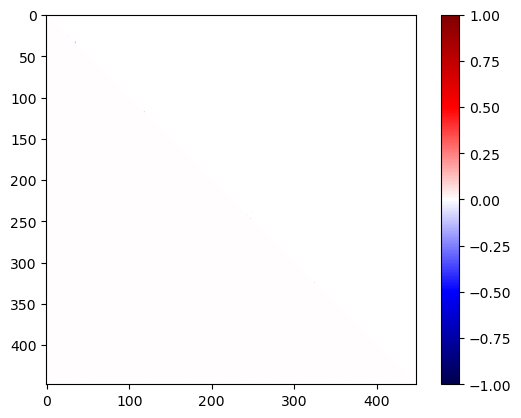

In [222]:
plt.imshow(np.squeeze(corr_pair[r,c,freq,:,:]),vmin=-1,vmax=1,cmap='seismic')
plt.colorbar()

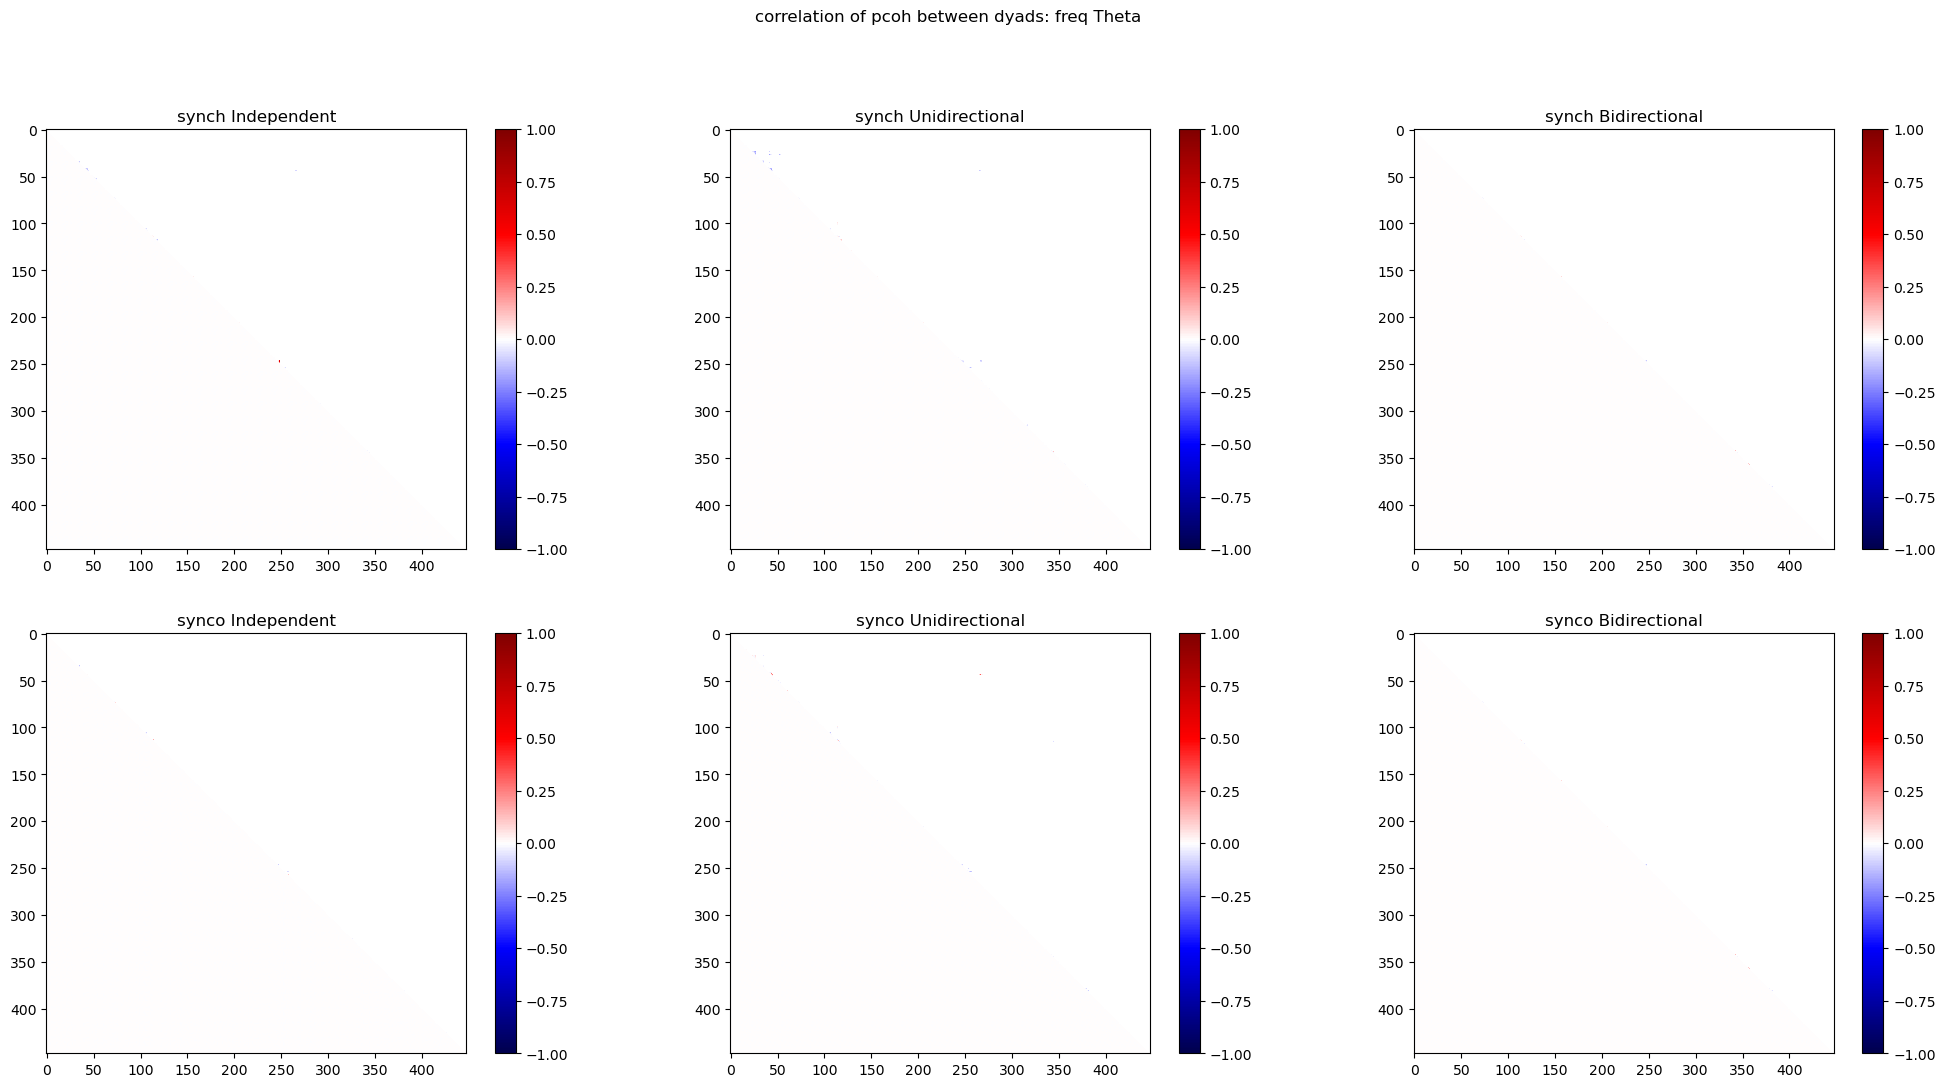

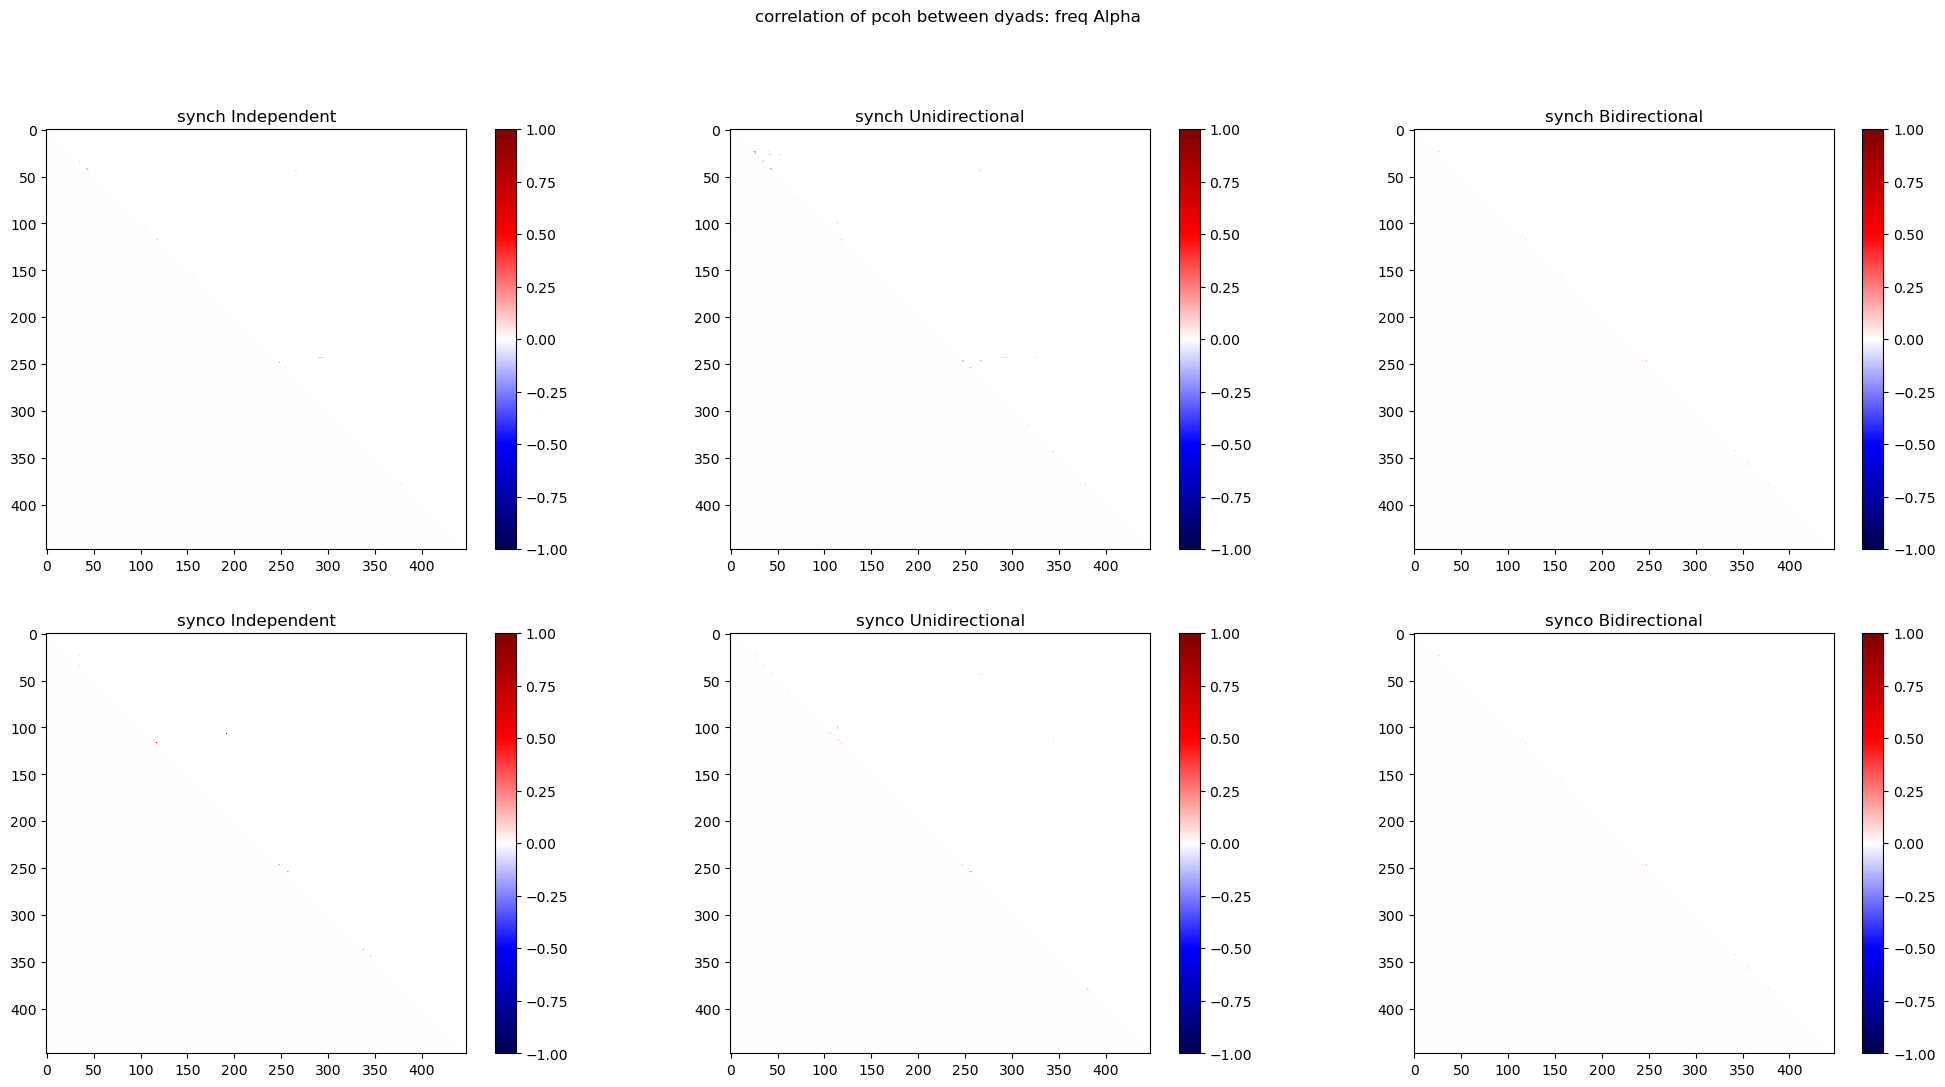

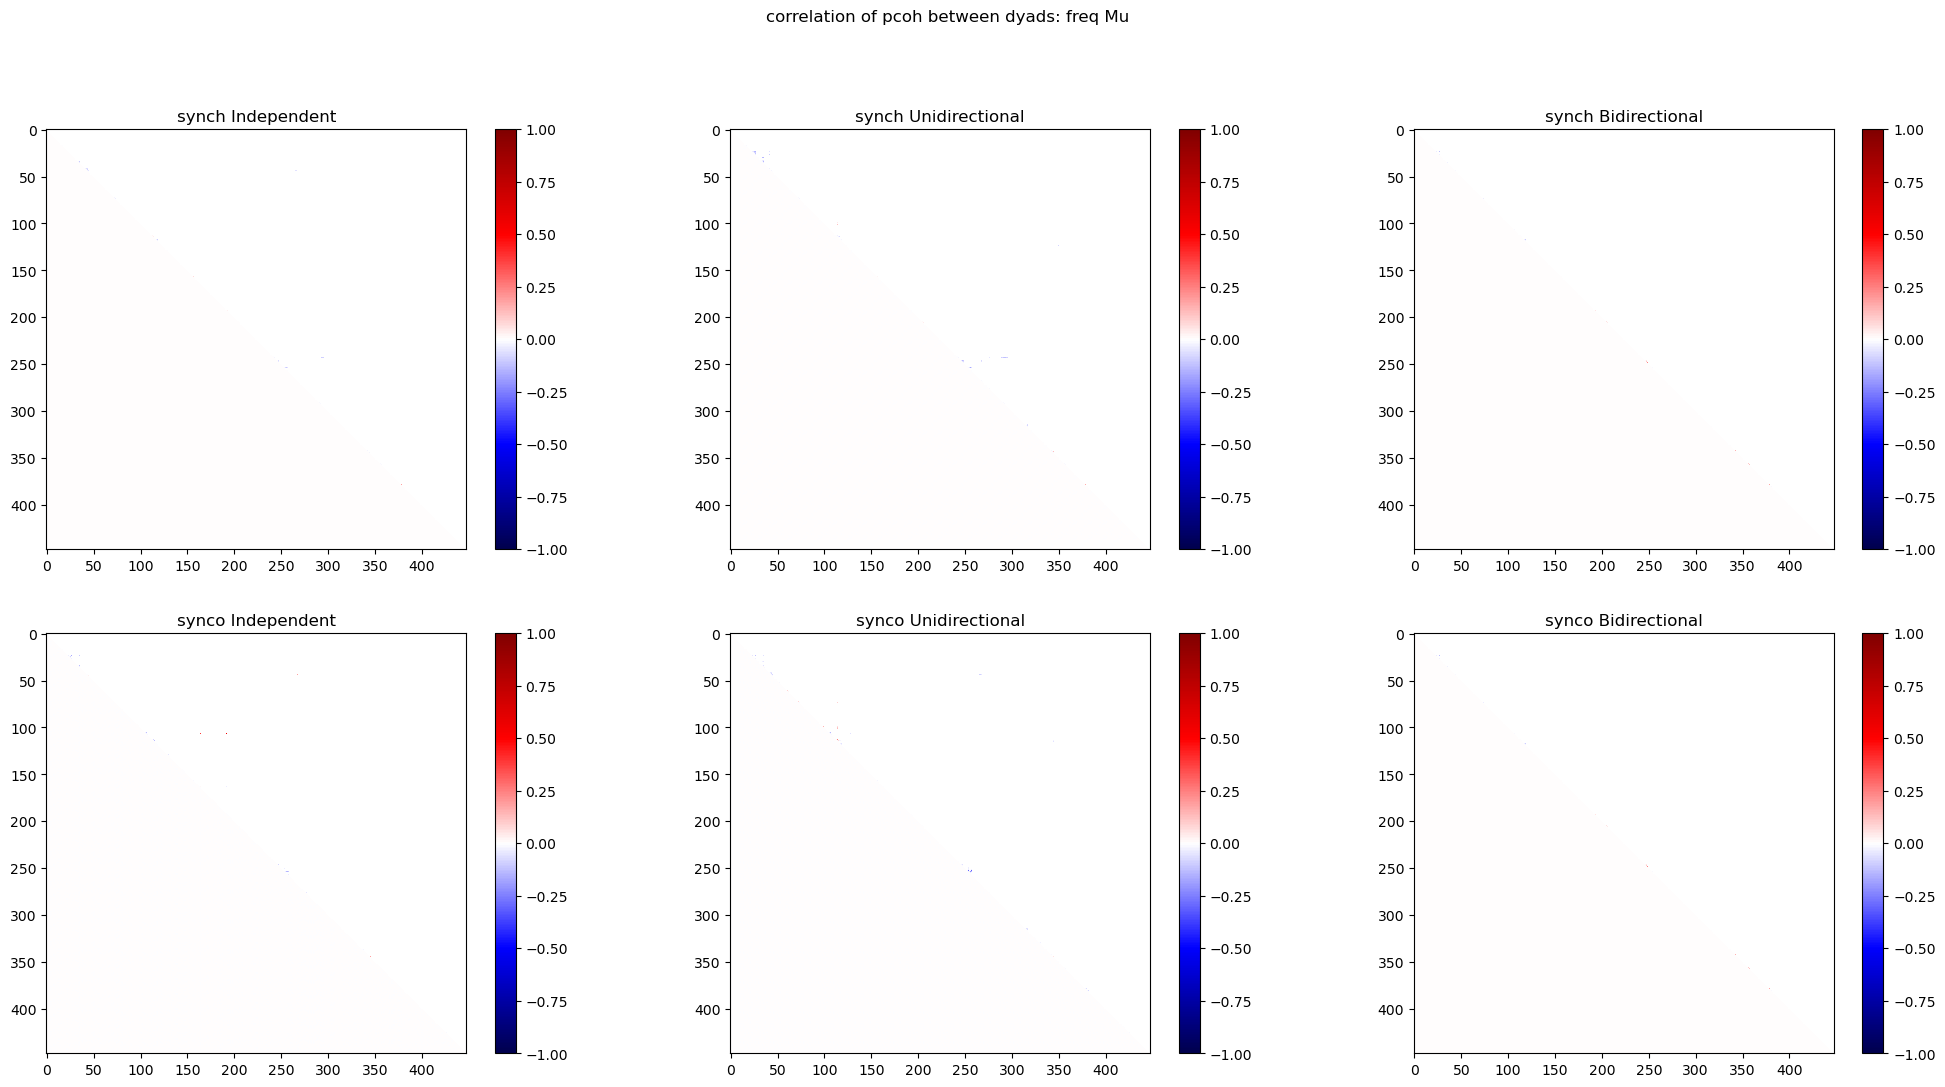

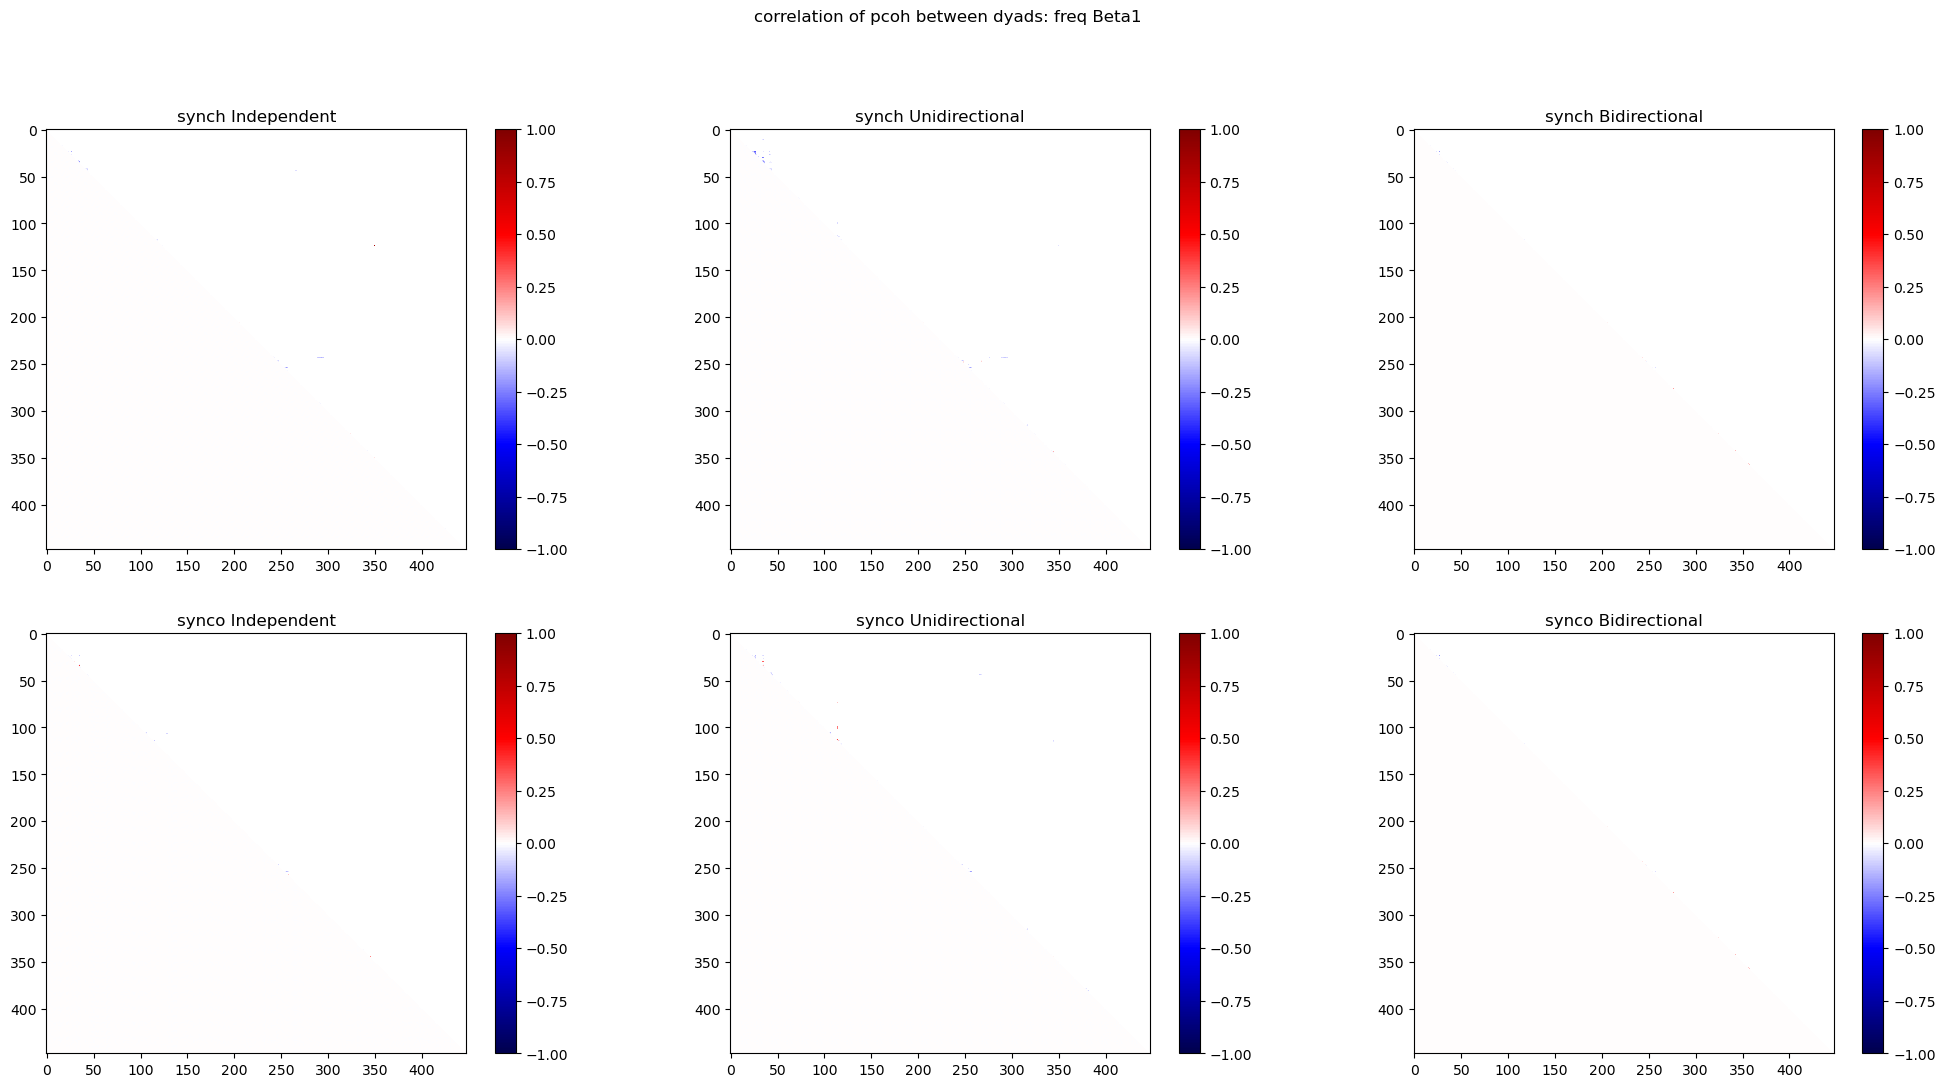

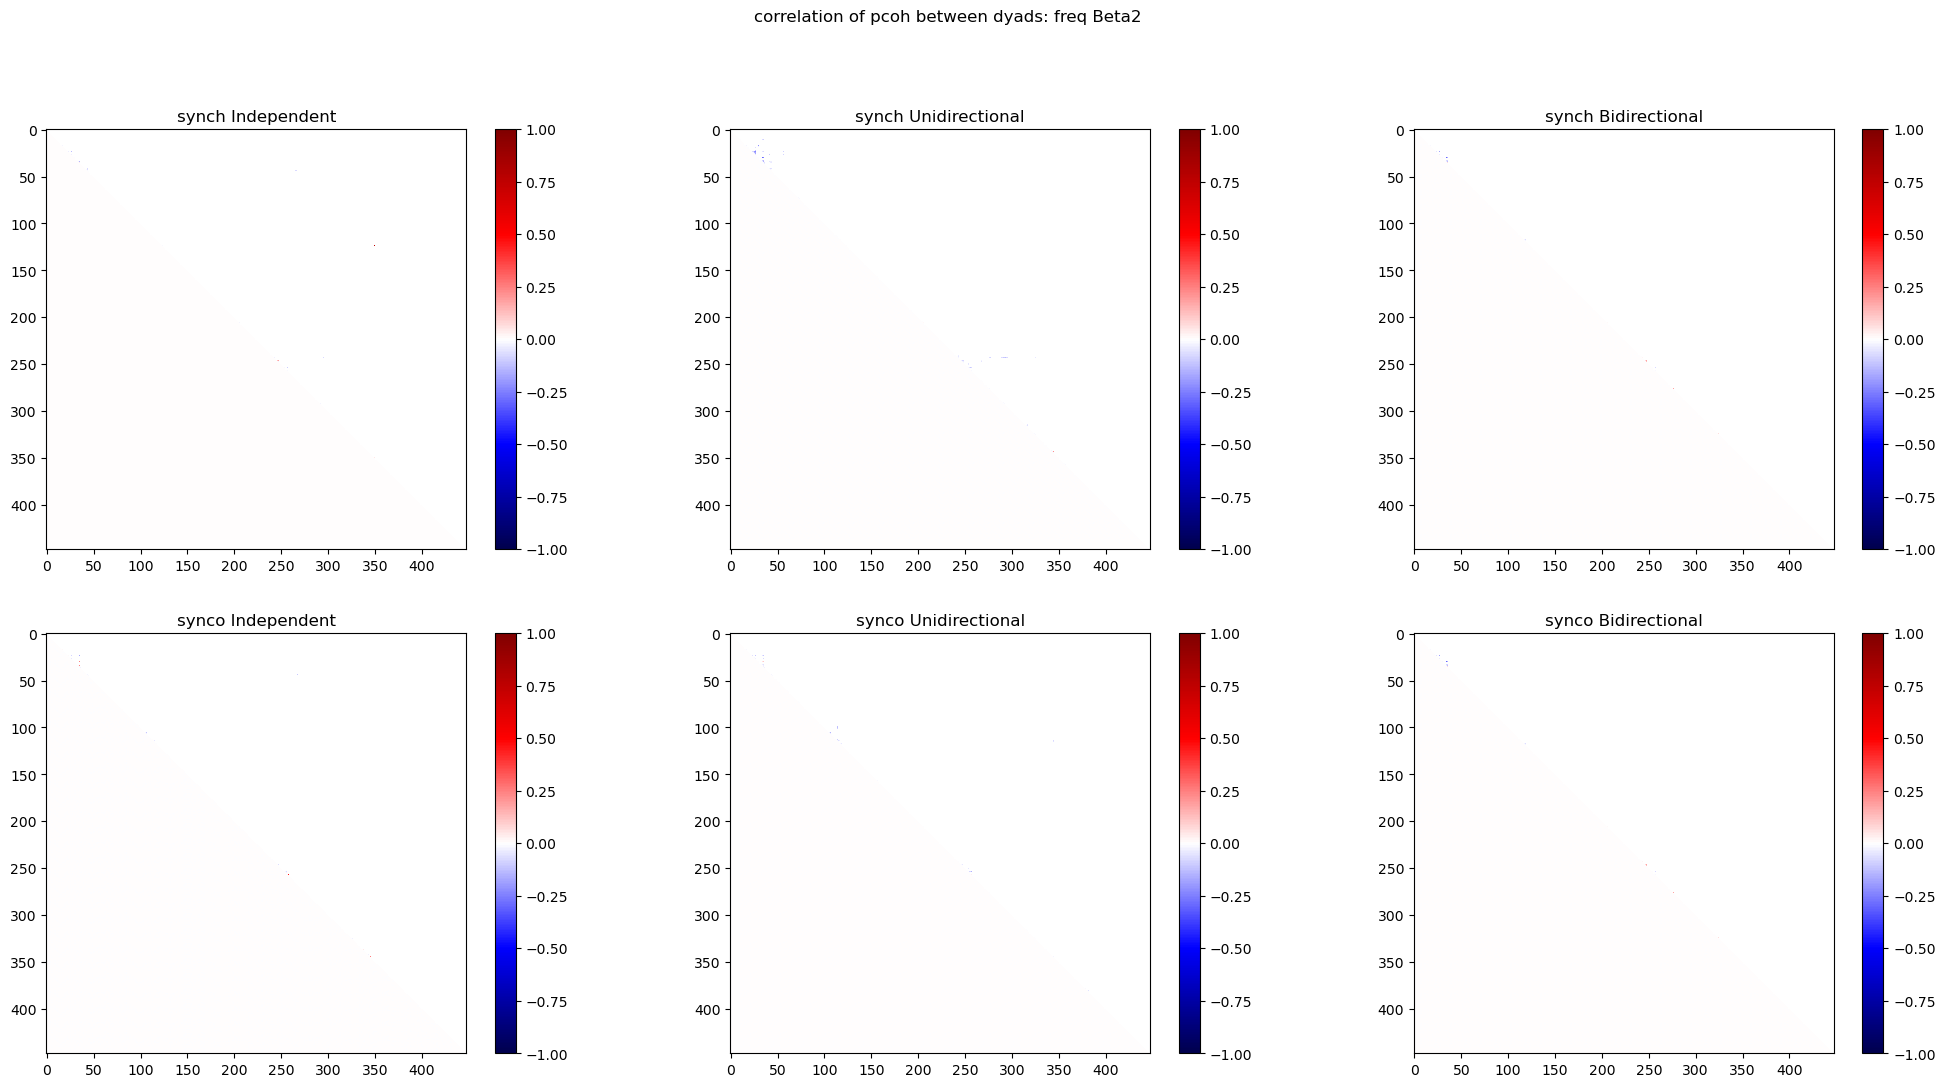

In [223]:
cond3names=['Independent','Unidirectional','Bidirectional']
syn2names=['synch','synco']
bandlabels = ['Theta','Alpha','Mu','Beta1','Beta2']
for freq in range(5):
    fig,axs = plt.subplots(2,3,figsize=(25, 12))
    for r in range(2):
        for c in range(3):
            plt.sca(axs[r,c])
            plt.imshow(np.squeeze(corr_pair[r,c,freq,:,:]),vmin=-1,vmax=1,cmap='seismic')
            plt.title(syn2names[r]+' '+cond3names[c])
            plt.colorbar()
    plt.suptitle('correlation of pcoh between dyads: freq '+bandlabels[freq])

In [ ]:
corr_pair_match=np.zeros((2,5,448,448))
for freq in range(5):
    for i in range(448):
        for j in range(448):
            for c in range(2):
                if i<j:
                    if corr_pair[c,0,freq,i,j]<corr_pair[c,1,freq,i,j]<corr_pair[c,2,freq,i,j] 

In [67]:
c=1
corr_pair[c,0,freq,i,j]<corr_pair[c,1,freq,i,j]<corr_pair[c,2,freq,i,j] 

False

In [ ]:
for j in range(5):
    plt.figure()
    plt.imshow((x[j,:,:]-y),cmap= 'jet')
    plt.colorbar()
    plt.title(j)